Single-threaded hashing performance with

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Javascript
import getpass

In [41]:
file_name = "distros"
file_size = 19767933068
# file_size = 9374720
pwd = "/mnt/ramdisk"
max_threads = 4
iterations = 5
target = 'distros'
password = None

In [3]:
if password is None:
    password = getpass.getpass()

In [4]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [5]:
def parse_real_time(data: str):
    results = []
    match = re.search(R"real\s(\d+)m([\d.]+)s", data)
    minutes = float(match.group(1))
    seconds = float(match.group(2))
    return minutes * 60 + seconds

def parse_real_time_sequence(data: str):
    results = []
    for match in re.findall(R"real\s(\d+)m([\d.]+)s", data):
        print(match[0])
        print(match[1])
        minutes = float(match[0])
        seconds = float(match[1])
        results.append(minutes * 60 + seconds)
    return results

In [6]:
data = {}

In [7]:
def run_benchmark(name: str, use_threads:bool = True):
    duration = np.ndarray(shape=(iterations, max_threads))
    
    if use_threads:
        for t in range(1, max_threads+1):
            for i in range(0, iterations):
                result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
                result_str = '\n'.join(result)
                print(f"-- iteration {i+1} | threads {t}\n{result_str}")
                duration[i, t-1] = parse_real_time(result_str)
    else:
        for i in range(0, iterations):
            t = 1
            result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
            result_str = '\n'.join(result)
            print(f"-- iteration {i+1} | threads {t}\n{result_str}")
            duration[i, :] = parse_real_time(result_str)

    speed = file_size / duration
    mean = np.mean(speed, axis=0)
    std  = np.std(speed, axis=0)
    return (mean, std)

### mktorrent

In [11]:
mktorrent_data = run_benchmark("mktorrent")

-- iteration 1 | threads 1

real	0m27.747s
user	0m27.048s
sys	0m8.653s

-- iteration 2 | threads 1

real	0m26.110s
user	0m25.576s
sys	0m7.423s

-- iteration 3 | threads 1

real	0m27.460s
user	0m26.876s
sys	0m7.654s

-- iteration 1 | threads 2

real	0m13.191s
user	0m26.016s
sys	0m6.385s

-- iteration 2 | threads 2

real	0m13.609s
user	0m26.557s
sys	0m7.191s

-- iteration 3 | threads 2

real	0m11.906s
user	0m23.631s
sys	0m4.629s

-- iteration 1 | threads 3

real	0m8.632s
user	0m25.213s
sys	0m5.417s

-- iteration 2 | threads 3

real	0m8.453s
user	0m24.936s
sys	0m4.947s

-- iteration 3 | threads 3

real	0m7.863s
user	0m23.343s
sys	0m4.224s

-- iteration 1 | threads 4

real	0m7.645s
user	0m29.557s
sys	0m5.185s

-- iteration 2 | threads 4

real	0m6.820s
user	0m26.555s
sys	0m4.628s

-- iteration 3 | threads 4

real	0m6.631s
user	0m25.858s
sys	0m4.575s



In [9]:
torrenttools_openssl_data = run_benchmark("torrenttools_openssl")

-- iteration 1 | threads 1

real	0m29.026s
user	0m27.528s
sys	0m8.906s

-- iteration 2 | threads 1

real	0m27.020s
user	0m26.433s
sys	0m8.268s

-- iteration 3 | threads 1

real	0m28.023s
user	0m26.746s
sys	0m8.473s

-- iteration 1 | threads 2

real	0m13.018s
user	0m23.975s
sys	0m5.178s

-- iteration 2 | threads 2

real	0m13.020s
user	0m23.791s
sys	0m4.770s

-- iteration 3 | threads 2

real	0m12.019s
user	0m23.548s
sys	0m4.691s

-- iteration 1 | threads 3

real	0m9.028s
user	0m23.908s
sys	0m4.548s

-- iteration 2 | threads 3

real	0m10.028s
user	0m26.593s
sys	0m6.617s

-- iteration 3 | threads 3

real	0m10.028s
user	0m27.296s
sys	0m5.161s

-- iteration 1 | threads 4

real	0m7.028s
user	0m27.337s
sys	0m4.464s

-- iteration 2 | threads 4

real	0m7.028s
user	0m24.566s
sys	0m4.240s

-- iteration 3 | threads 4

real	0m7.028s
user	0m24.686s
sys	0m4.397s



In [33]:
torrenttools_isal_data = run_benchmark("torrenttools_isal")

-- iteration 1 | threads 1

real	0m11.023s
user	0m10.506s
sys	0m7.301s

-- iteration 2 | threads 1

real	0m12.029s
user	0m11.122s
sys	0m8.030s

-- iteration 3 | threads 1

real	0m12.029s
user	0m11.407s
sys	0m8.104s

-- iteration 1 | threads 2

real	0m9.027s
user	0m15.215s
sys	0m8.109s

-- iteration 2 | threads 2

real	0m6.025s
user	0m9.599s
sys	0m5.191s

-- iteration 3 | threads 2

real	0m5.023s
user	0m8.623s
sys	0m4.515s

-- iteration 1 | threads 3

real	0m5.019s
user	0m9.678s
sys	0m4.487s

-- iteration 2 | threads 3

real	0m5.019s
user	0m9.488s
sys	0m4.364s

-- iteration 3 | threads 3

real	0m5.031s
user	0m9.857s
sys	0m4.536s

-- iteration 1 | threads 4

real	0m5.026s
user	0m10.467s
sys	0m4.839s

-- iteration 2 | threads 4

real	0m8.024s
user	0m12.507s
sys	0m7.294s

-- iteration 3 | threads 4

real	0m5.032s
user	0m10.310s
sys	0m4.684s



In [12]:
imdl_data = run_benchmark("imdl", use_threads=False)

-- iteration 1 | threads 1

real	0m54.709s
user	0m45.884s
sys	0m7.296s

-- iteration 2 | threads 1

real	0m55.077s
user	0m45.766s
sys	0m7.207s

-- iteration 3 | threads 1

real	0m48.055s
user	0m41.989s
sys	0m5.004s



In [13]:
dottorrent_cli_data = run_benchmark("dottorrent-cli", use_threads=False)

-- iteration 1 | threads 1

real	0m47.558s
user	0m33.615s
sys	0m12.838s

-- iteration 2 | threads 1

real	0m48.029s
user	0m34.022s
sys	0m12.659s

-- iteration 3 | threads 1

real	0m54.370s
user	0m37.276s
sys	0m15.326s



In [14]:
pyrocore_data = run_benchmark("pyrocore", use_threads=False)

-- iteration 1 | threads 1

real	0m31.330s
user	0m24.946s
sys	0m5.685s

-- iteration 2 | threads 1

real	0m33.619s
user	0m26.007s
sys	0m6.728s

-- iteration 3 | threads 1

real	0m35.367s
user	0m27.077s
sys	0m7.476s



In [26]:
transmission_create_data = run_benchmark("transmission-create", use_threads=False)

-- iteration 1 | threads 1

real	0m26.008s
user	0m22.112s
sys	0m3.548s

-- iteration 2 | threads 1

real	0m25.006s
user	0m21.329s
sys	0m3.134s

-- iteration 3 | threads 1

real	0m25.006s
user	0m21.542s
sys	0m3.061s



In [35]:
benchmark_data = {
    "mktorrent": mktorrent_data, 
    "imdl": imdl_data,
    "dottorrent-cli": dottorrent_cli_data,
    "pyrocore": pyrocore_data,
    "transmission-create": transmission_create_data,
    "torrenttools (OpenSSL)": torrenttools_openssl_data,
    "torrenttools (ISA-L)": torrenttools_isal_data
}

In [36]:
programs = list(benchmark_data.keys())
threads = list(range(1, max_threads+1))
index = pd.MultiIndex.from_product((threads, programs), names=["threads", "programs"])

speed_mean_data = {}
speed_stddev_data = {}
for program, data in benchmark_data.items():
    speed_mean_data[program] = data[0]
    speed_stddev_data[program] = data[1]
    

speed_mean = pd.DataFrame(speed_mean_data).stack()
speed_stddev = pd.DataFrame(speed_stddev_data).stack()

In [37]:
df = pd.DataFrame()
df["speed_mean"], df["speed_stddev"] = speed_mean / 1e6, speed_stddev / 1e6
df.index = index

In [38]:
df

speed_mean  speed_stddev
threads programs                                         
1       mktorrent                729.805997     19.539098
        imdl                     377.201265     24.174389
        dottorrent-cli           396.941457     23.647587
        pyrocore                 592.631559     29.584524
        transmission-create      780.375481     14.357259
        torrenttools (OpenSSL)   706.021391     20.646039
        torrenttools (ISA-L)    1693.349249     70.700690
2       mktorrent               1537.163131     89.098876
        imdl                     377.201265     24.174389
        dottorrent-cli           396.941457     23.647587
        pyrocore                 592.631559     29.584524
        transmission-create      780.375481     14.357259
        torrenttools (OpenSSL)  1560.501909     59.553812
        torrenttools (ISA-L)    3135.445179    720.037089
3       mktorrent               2380.896802     96.208764
        imdl                     377.201265     24.174389
        dottorrent-cli           396.941457     23.647587
        pyrocore                 592.631559     29.584524
        transmission-create      780.375481     14.357259
        torrenttools (OpenSSL)  2044.057441    102.931696
        torrenttools (ISA-L)    3935.488377      4.428582
4       mktorrent               2821.798842    170.296659
        imdl                     377.201265     24.174389
        dottorrent-cli           396.941457     23.647587
        pyrocore                 592.631559     29.584524
        transmission-create      780.375481     14.357259
        torrenttools (OpenSSL)  2812.739480      0.000000
        torrenttools (ISA-L)    3441.726572    691.641994

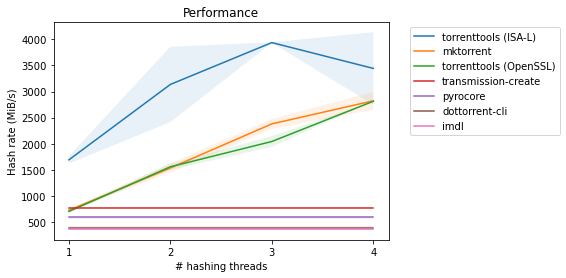

In [39]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1)

programs = df.index.unique(level=1)
threads = df.index.unique(level=0)
programs_by_max_speed = {}

for program in programs:
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    programs_by_max_speed[program] = np.max(sm)

sorted_programs = sorted(programs_by_max_speed.keys(), key=lambda x : programs_by_max_speed[x], reverse=True)

for idx, program in enumerate(sorted_programs):
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    sd = df.loc[df.index.get_level_values(1) == program, "speed_stddev"]
    ax.plot(threads, sm)
    ax.fill_between(threads, sm - sd, sm + sd, alpha=0.1)

ax.set_title("Performance")
ax.set_xlabel("# hashing threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.set_xticks(list(range(1, max_threads+1)))
ax.legend(sorted_programs, bbox_to_anchor=(1.05, 1), loc='upper left')